<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [120]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [121]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [122]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [123]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

### Show the dataset

In [124]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Remove The column  Unnamed: 0. It's not needed

In [126]:
boston_df_new=boston_df.drop('Unnamed: 0',axis=1)

In [127]:
boston_df_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Describe Dataset

In [128]:
boston_df_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations

Text(0.5, 1.0, 'Median value of owner-occupied homes')

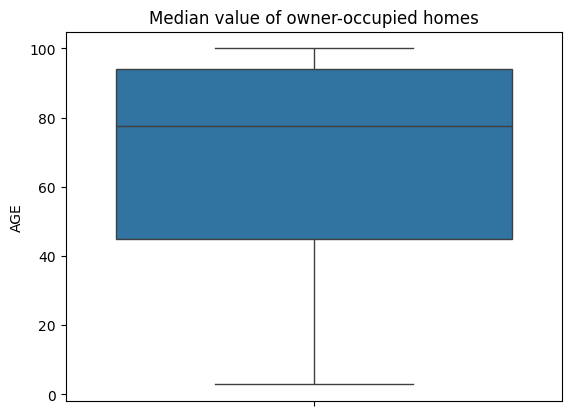

In [129]:
ax=sns.boxplot(data=boston_df_new,y='AGE')
ax.set_title('Median value of owner-occupied homes')

In [20]:
boston_df_new['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

Conclusion : in the bloxplot we see the minimum and the maximum values, 25% and 75% percentiles (blue box) and the line in the middle is the median

Text(0.5, 1.0, 'Numbers of house using Charles River (1 if tract bounds river; 0 otherwise)')

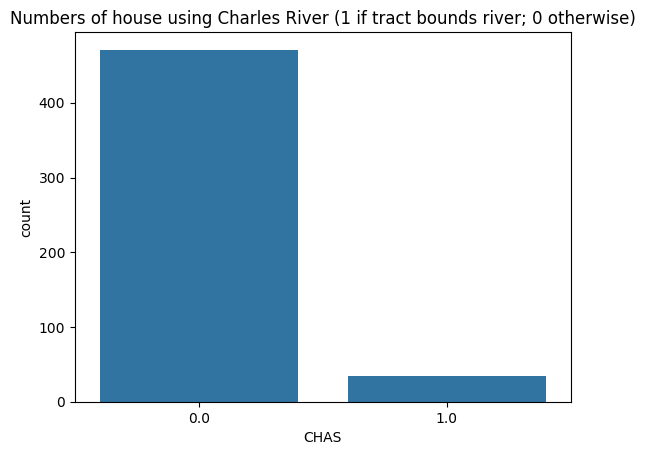

In [131]:
ax=sns.countplot(data=boston_df_new,x='CHAS' )
ax.set_title('Numbers of house using Charles River (1 if tract bounds river; 0 otherwise)')

Conclusion : this mean that most of the houses are otherwise 

In [132]:
boston_df_new.loc[(boston_df_new['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df_new.loc[(boston_df_new['AGE'] > 35)&(boston_df_new['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df_new.loc[(boston_df_new['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

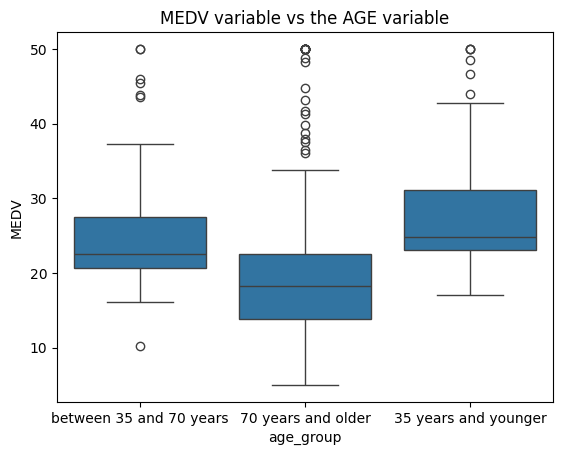

In [137]:
ax=sns.boxplot(data=boston_df_new,x='age_group',y='MEDV')
ax.set_title('MEDV variable vs the AGE variable')

Text(0.5, 1.0, 'relationship between Nitric oxide concentrations and proportion non-retail business acres per town')

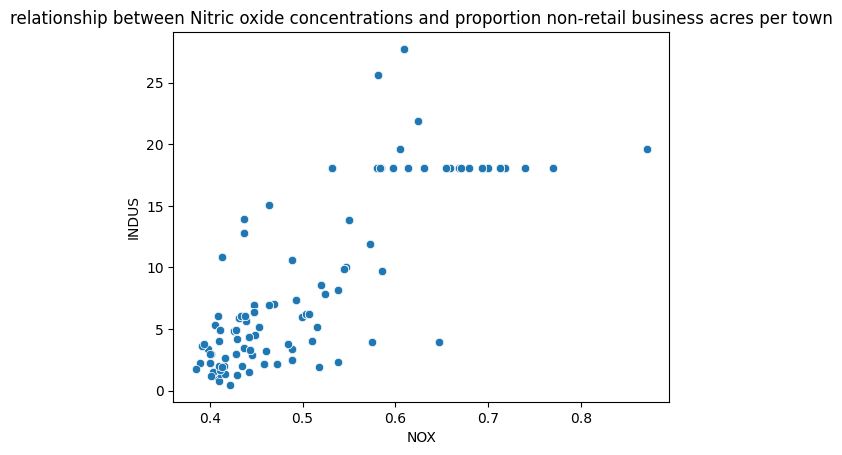

In [83]:
ax=sns.scatterplot(x="NOX",
                    y="INDUS",
                    data=boston_df_new)
ax.set_title('relationship between Nitric oxide concentrations and proportion non-retail business acres per town')

What can you say about the relationship?

Conclusion : there is a string relashionship betwwen proportion of non-retail business acres per town and Nitric oxide concentrations 

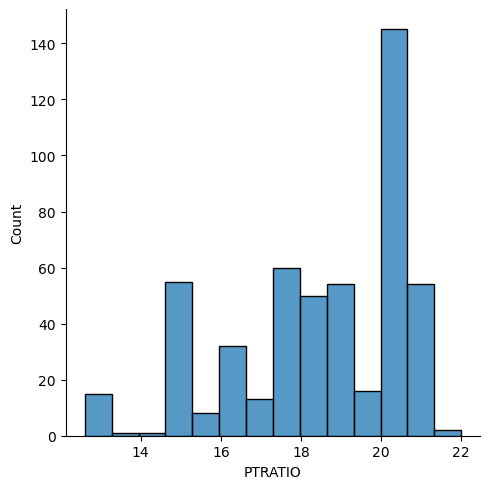

In [138]:
ax=sns.displot( data=boston_df_new, x="PTRATIO")

# Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0:$  the mean values are equal
*   $H\_1:$ the mean values differ

In [139]:
stats.ttest_ind(boston_df_new[boston_df_new['CHAS']==1]['MEDV'], boston_df_new[boston_df_new['CHAS']==0]['MEDV'],equal_var=True)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0:$  the mean values are equal
*   $H\_1:$ the mean values differ

In [140]:
lm=ols('AGE ~ MEDV',data=boston_df_new[boston_df_new['AGE'] >= 70]).fit()
table=sm.stats.anova_lm(lm)
print(table)


             df        sum_sq      mean_sq          F    PR(>F)
MEDV        1.0   1162.066079  1162.066079  16.472336  0.000064
Residual  285.0  20105.759496    70.546525        NaN       NaN


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis
*   $H\_0: $  Nitric oxide  has no effect on proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide  has an effect on proportion of non-retail business acres per town

In [112]:
stats.pearsonr(boston_df_new['NOX'],boston_df_new['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Since the correlation coefficient is 0.76 mean that there is a strong relashionship between variable, and also pvalue is less then 0.05 that mean that we will reject the null hypothesis as there is relashionship

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis
*   $H\_0: $ distance has no effect on median value
*   $H\_1:$ distance has an effect on median value

In [142]:
## X is the input variables (or independent variables)
x=boston_df_new['DIS']
## y is the target/dependent variable
y=boston_df_new['MEDV']
## add an intercept (beta_0) to our model
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
prediction=model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        08:05:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in median value based on distance. The coefficient 0.2489 means that the median value of owner occupied homes are 0.2489 more based on distance .